In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\anmol\Downloads\pima-indians-diabetes.data.csv', header=None)

df.columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:

dt_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_entropy.fit(X_train, y_train)

dt_gini = DecisionTreeClassifier(criterion="gini", max_depth=3)
dt_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

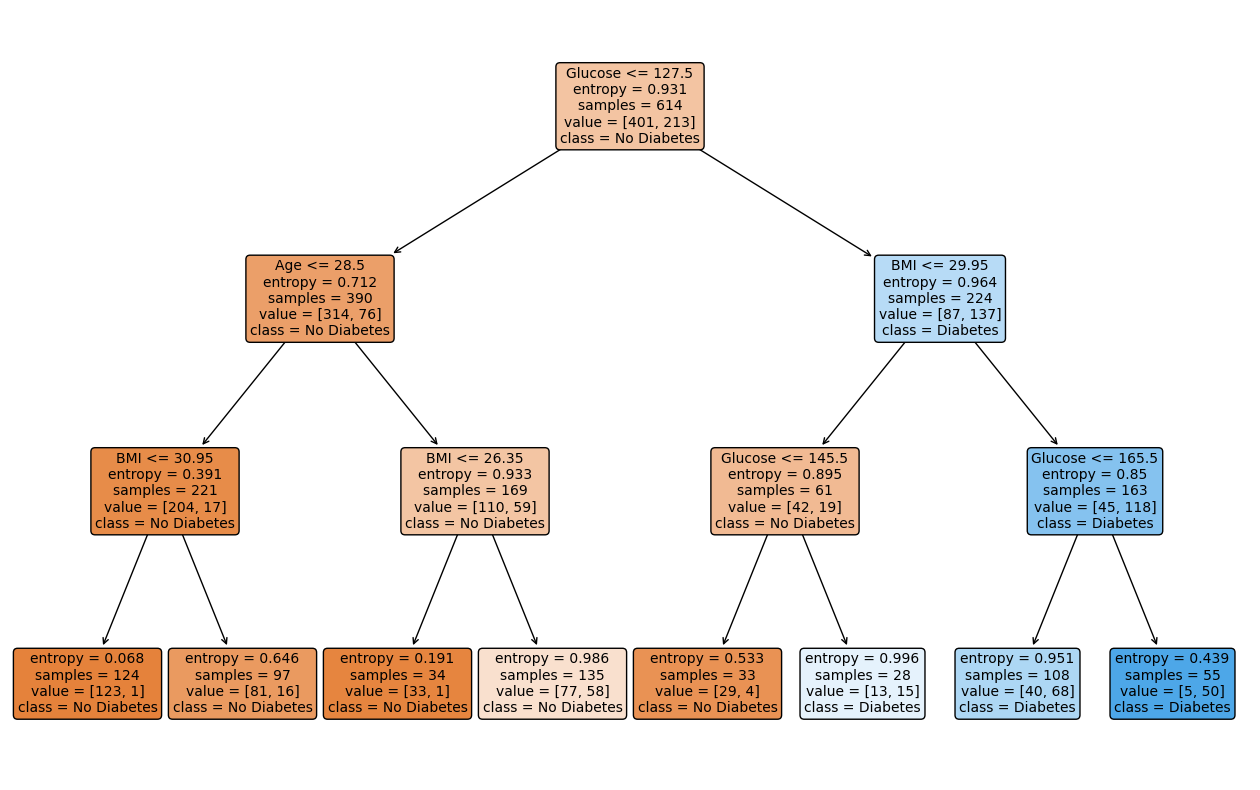

In [10]:
plt.figure(figsize=(16, 10))

plot_tree(
    dt_entropy,
    feature_names=list(X.columns),            # FIXED
    class_names=["No Diabetes", "Diabetes"],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.show()


In [11]:

def entropy(p):
    if p == 0 or p == 1:
        return 0
    return -p*np.log2(p) - (1-p)*np.log2(1-p)

p1 = df["Outcome"].mean()
root_entropy = entropy(p1)
root_entropy


0.9331343166407831

In [12]:

threshold = df["Glucose"].median()
left = df[df["Glucose"] <= threshold]
right = df[df["Glucose"] > threshold]

def weighted_entropy(left, right):
    p_left = len(left) / (len(left) + len(right))
    p_right = 1 - p_left
    e_left = entropy(left["Outcome"].mean())
    e_right = entropy(right["Outcome"].mean())
    return p_left * e_left + p_right * e_right

info_gain_glucose = root_entropy - weighted_entropy(left, right)
info_gain_glucose


0.11726082761962453

In [13]:

def gini(p):
    return 2 * p * (1 - p)

gini(df["Outcome"].mean())


0.45437282986111116